# Linear algebra and tensor basics

This notebook provides in introduction to essential elements of linear algebra and PyTorch tensors needed to understand the dimensionality reduction algorithms performed by *flowTorch*.

In [1]:
import torch as pt
import visualization as vis

## PyTorch Tensors

PyTorch provides a [tensor](https://pytorch.org/docs/stable/tensors.html) type to define n-dimensional arrays. Each element in a tensor must be of the same type. Working with PyTorch tensors has a very similar look and feel as working with Numpy arrays. flowTorch uses PyTorch tensors as data structure for field data.

### Creating Tensors

In [2]:
# creating a vector of length 10 initialized with zeros
origin = pt.zeros(10)
origin

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [3]:
# the two most important tensor attributes: size and dtype
print("Dimension: ", origin.size())
print("Datatype: ", origin.dtype)

Dimension:  torch.Size([10])
Datatype:  torch.float32


In [4]:
# create a 2D tensor with 3 rows and two columns filled with ones
ones = pt.ones((3, 2))
ones

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [5]:
# 1D tensor with 5 linearly spaced values between zero and ten
x = pt.linspace(0, 10, 5)
x

tensor([ 0.0000,  2.5000,  5.0000,  7.5000, 10.0000])

In [6]:
# creating a tensor from a Python list
X_list = [
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8],
    [9, 10, 11]
]
X = pt.tensor(X_list)
print("Created tensor of shape ", X.size())
X

Created tensor of shape  torch.Size([4, 3])


tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])

### Accessing elements in a tensor

PyTorch tensor support element access via the typical square bracket syntax. Also slicing is supported.

In [7]:
# accessing the element in the fourth row and thrid column
X[3, 2]

tensor(11)

In [8]:
# accessing the first column
X[:, 0]

tensor([0, 3, 6, 9])

In [9]:
# accessing the second row
X[1]

tensor([3, 4, 5])

In [10]:
# accessing the first two elements in the second column
X[:2, 1]

tensor([1, 4])

In [11]:
# accessing the last two column of the thrid row
X[2, -2:]

tensor([7, 8])

### Basic tensor operations

In [12]:
# elementwise addition of a scalar value
X = pt.zeros((2, 3))
X += 2
X

tensor([[2., 2., 2.],
        [2., 2., 2.]])

In [13]:
# elementwise multiplication with a scalar value
Y = X * 2
Y

tensor([[4., 4., 4.],
        [4., 4., 4.]])

In [14]:
# elementwise subtraction of two tensors with the same shape
X - Y

tensor([[-2., -2., -2.],
        [-2., -2., -2.]])

In [15]:
# elementwise multiplication of two tensors with the same shape
X * Y

tensor([[8., 8., 8.],
        [8., 8., 8.]])

In [16]:
# subtracting a 1D tensor from each row
ones = pt.ones((1, Y.size()[1]))
print("Shape of 1D tensor: ", ones.size())
Y - ones

Shape of 1D tensor:  torch.Size([1, 3])


tensor([[3., 3., 3.],
        [3., 3., 3.]])

In [17]:
# subtracting a 1D tensor from each column
twos = pt.ones((Y.size()[0]), 1) * 2
print("Shape of 1D tensor: ", twos.size())
Y - twos

Shape of 1D tensor:  torch.Size([2, 1])


tensor([[2., 2., 2.],
        [2., 2., 2.]])

In [18]:
# transpose (swapping rows and columns in 2D)
print("Shape of Y/Y.T: ", Y.size(), "/", Y.T.size())
Y.T

Shape of Y/Y.T:  torch.Size([2, 3]) / torch.Size([3, 2])


tensor([[4., 4.],
        [4., 4.],
        [4., 4.]])

## Linear algebra basics
### Scalar product

The scalar or dot product between two vectors $\mathbf{a}$ and $\mathbf{b}$ of length $N$ is defined as:

$$
  \langle \mathbf{a}, \mathbf{b} \rangle := \sum\limits_{i=1}^{N} a_i b_i.
$$
The dot product has couple of useful properties; see section 1.2 in [Introduction to linear algebra](https://math.mit.edu/~gs/linearalgebra/).

1) The dot product of a vector with itself is equal to the squared length/magnitude
$ \langle \mathbf{a}, \mathbf{a} \rangle = \left\|\mathbf{a}\right\|^2_2 $

example: $\mathbf{a} = (1, 2, 2)^T$; $\langle \mathbf{a}, \mathbf{a} \rangle = 1^2 + 2^2 + 2^2 = 9$

In [19]:
a = pt.tensor([1.0, 2.0, 2.0])
# Frobenius/2-norm
len_a = pt.norm(a)
assert pt.dot(a, a) == len_a**2
pt.dot(a, a)

tensor(9.)

2) The angle between two normalized vectors is equal to the cosine of the enclosed angle: ...

### Cross product

### Matrix multiplication

### Identity matrix

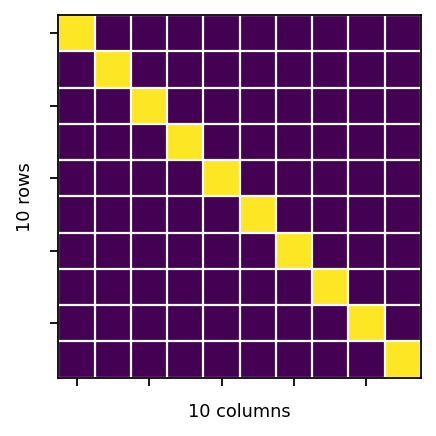

In [20]:
ones = pt.ones(10)
identity = pt.diag(ones)
vis.plot_matrix_as_heatmap(identity, annotate=False)

### Symmetric matrix

### Orthogonal matrix

### Orthonormal matrix

### Unitary matrix

## Matrix decomposition
### Eigen-decomposition

### Singular value decomposition